In [ ]:
""" Variational Auto-Encoder Example.
Using a variational auto-encoder to generate digits images from noise.
MNIST handwritten digits are used as training examples.
References:
    - Auto-Encoding Variational Bayes The International Conference on Learning
    Representations (ICLR), Banff, 2014. D.P. Kingma, M. Welling
    - Understanding the difficulty of training deep feedforward neural networks.
    X Glorot, Y Bengio. Aistats 9, 249-256
    - Y. LeCun, L. Bottou, Y. Bengio, and P. Haffner. "Gradient-based
    learning applied to document recognition." Proceedings of the IEEE,
    86(11):2278-2324, November 1998.
Links:
    - [VAE Paper] https://arxiv.org/abs/1312.6114
    - [Xavier Glorot Init](www.cs.cmu.edu/~bhiksha/courses/deeplearning/Fall.../AISTATS2010_Glorot.pdf).
    - [MNIST Dataset] http://yann.lecun.com/exdb/mnist/
Author: Aymeric Damien
Project: https://github.com/aymericdamien/TensorFlow-Examples/
"""
from __future__ import division, print_function, absolute_import

import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# convert list into array
from numpy import array

In [ ]:
# read CSV
df = pd.read_csv('test_sample.csv')
total_count = df['time'].max()
print(total_count)

# Get data
time = df['time'].values
x_global = df['X'].values
x_g = df['X'].values
print(x_g.max())

43602
2516.495245


In [ ]:
# normalizing
x_max = x_global.max()
x_min = x_global.min()
x_norm = (x_global - x_min)/(x_max-x_min)
x_global = x_norm

In [ ]:
# set strides of starting point
st_pnt = []
for stride in range(0, 215):
    st = stride * 200
    st_pnt.append(st)
print(st_pnt)

[0, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400, 2600, 2800, 3000, 3200, 3400, 3600, 3800, 4000, 4200, 4400, 4600, 4800, 5000, 5200, 5400, 5600, 5800, 6000, 6200, 6400, 6600, 6800, 7000, 7200, 7400, 7600, 7800, 8000, 8200, 8400, 8600, 8800, 9000, 9200, 9400, 9600, 9800, 10000, 10200, 10400, 10600, 10800, 11000, 11200, 11400, 11600, 11800, 12000, 12200, 12400, 12600, 12800, 13000, 13200, 13400, 13600, 13800, 14000, 14200, 14400, 14600, 14800, 15000, 15200, 15400, 15600, 15800, 16000, 16200, 16400, 16600, 16800, 17000, 17200, 17400, 17600, 17800, 18000, 18200, 18400, 18600, 18800, 19000, 19200, 19400, 19600, 19800, 20000, 20200, 20400, 20600, 20800, 21000, 21200, 21400, 21600, 21800, 22000, 22200, 22400, 22600, 22800, 23000, 23200, 23400, 23600, 23800, 24000, 24200, 24400, 24600, 24800, 25000, 25200, 25400, 25600, 25800, 26000, 26200, 26400, 26600, 26800, 27000, 27200, 27400, 27600, 27800, 28000, 28200, 28400, 28600, 28800, 29000, 29200, 29400, 29600, 29800, 30000,

In [ ]:
# Parameters
learning_rate = 0.0001
num_steps = 30000
batch_size = 20

# Network Parameters
input_dim = 300 # MNIST images are 28x28 pixels
hidden_dim = 150
latent_dim = 2

In [ ]:
# A custom initialization (see Xavier Glorot init)
def glorot_init(shape):
    return tf.random_normal(shape=shape, stddev=1. / tf.sqrt(shape[0] / 2.))

In [ ]:
# Variables
weights = {
    'encoder_h1': tf.Variable(glorot_init([input_dim, hidden_dim])),
    'z_mean': tf.Variable(glorot_init([hidden_dim, latent_dim])),
    'z_std': tf.Variable(glorot_init([hidden_dim, latent_dim])),
    'decoder_h1': tf.Variable(glorot_init([latent_dim, hidden_dim])),
    'decoder_out': tf.Variable(glorot_init([hidden_dim, input_dim]))
}
biases = {
    'encoder_b1': tf.Variable(glorot_init([hidden_dim])),
    'z_mean': tf.Variable(glorot_init([latent_dim])),
    'z_std': tf.Variable(glorot_init([latent_dim])),
    'decoder_b1': tf.Variable(glorot_init([hidden_dim])),
    'decoder_out': tf.Variable(glorot_init([input_dim]))
}

In [ ]:
# Building the encoder
input_signal = tf.placeholder(tf.float32, shape=[None, input_dim])
encoder = tf.matmul(input_signal, weights['encoder_h1']) + biases['encoder_b1']
encoder = tf.nn.tanh(encoder)
z_mean = tf.matmul(encoder, weights['z_mean']) + biases['z_mean']
z_std = tf.matmul(encoder, weights['z_std']) + biases['z_std']

# Sampler: Normal (gaussian) random distribution
eps = tf.random_normal(tf.shape(z_std), dtype=tf.float32, mean=0., stddev=1.0,
                       name='epsilon')
z = z_mean + tf.exp(z_std / 2) * eps

# Building the decoder (with scope to re-use these layers later)
decoder = tf.matmul(z, weights['decoder_h1']) + biases['decoder_b1']
decoder = tf.nn.tanh(decoder)
decoder = tf.matmul(decoder, weights['decoder_out']) + biases['decoder_out']
decoder = tf.nn.sigmoid(decoder)

In [ ]:
# euijoong
def encode_func (x) :
    en1 = tf.matmul(input_signal, weights['encoder_h1']) + biases['encoder_b1']
    en2 = tf.nn.tanh(en1)
    z_m = tf.matmul(en2, weights['z_mean']) + biases['z_mean']
    z_s = tf.matmul(en2, weights['z_std']) + biases['z_std']
    eps = tf.random_normal(tf.shape(z_s), dtype=tf.float32, mean=0., stddev=1.0,
                       name='epsilon')
#     z = z_m + tf.exp(z_s / 2) * eps
    z = z_m
    return z

def decode_func (z) :
    de1 = tf.matmul(z, weights['decoder_h1']) + biases['decoder_b1']
    de1 = tf.nn.tanh(de1)
    de2 = tf.matmul(de1, weights['decoder_out']) + biases['decoder_out']
    recon = tf.nn.sigmoid(de2)
    return recon

encode_op = encode_func (input_signal)
decode_op = decode_func(encode_op)

In [ ]:
# Define VAE Loss
def vae_loss(x_reconstructed, x_true):
    # Reconstruction loss
    encode_decode_loss = x_true * tf.log(1e-10 + x_reconstructed) \
                         + (1 - x_true) * tf.log(1e-10 + 1 - x_reconstructed)
    encode_decode_loss = -tf.reduce_sum(encode_decode_loss, 1)
    # KL Divergence loss
    kl_div_loss = 1 + z_std - tf.square(z_mean) - tf.exp(z_std)
    kl_div_loss = -0.5 * tf.reduce_sum(kl_div_loss, 1)
    return tf.reduce_mean(encode_decode_loss + kl_div_loss)

In [ ]:
loss_op = vae_loss(decoder, input_signal)
optimizer = tf.train.RMSPropOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)

In [ ]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

In [ ]:
# Start training
#with tf.Session() as sess:
sess = tf.Session()

# Run the initializer
sess.run(init)

for i in range(1, num_steps+1):
    # Prepare Data
    # Get the next batch of MNIST data (only images are needed, not labels)
    batch_idx = np.random.choice(st_pnt, batch_size)
    tmp_x = []
    for k in range(batch_size):
        for l in range(batch_idx[k], batch_idx[k] + input_dim):
            tmp_x.append(x_global[l])
    tmp_x_arr = array(tmp_x)

    # Get the next batch of MNIST data (only images are needed, not labels)
    batch_x = tmp_x_arr.reshape(batch_size, input_dim)
    
    
    # Train
    feed_dict = {input_signal: batch_x}
    _, l = sess.run([train_op, loss_op], feed_dict=feed_dict)
#     print(sess.run(train_op), sess.run(loss_op))
    if i % 1000 == 0 or i == 1 :
        print('Step %i, Loss: %f' % (i, l))
        
        #print(sess.run([z_mean[1,]]))

Step 1, Loss: 255.831131
Step 1000, Loss: 116.734032
Step 2000, Loss: 121.160599
Step 3000, Loss: 111.850281
Step 4000, Loss: 72.739296
Step 5000, Loss: 157.283737
Step 6000, Loss: 97.391724
Step 7000, Loss: 120.226097
Step 8000, Loss: 110.701561
Step 9000, Loss: 102.549011
Step 10000, Loss: 100.182793
Step 11000, Loss: 106.513817
Step 12000, Loss: 104.403503
Step 13000, Loss: 76.669777
Step 14000, Loss: 112.942665
Step 15000, Loss: 105.525696
Step 16000, Loss: 100.590416
Step 17000, Loss: 87.762657
Step 18000, Loss: 127.958351
Step 19000, Loss: 116.122581
Step 20000, Loss: 130.328476
Step 21000, Loss: 85.326149
Step 22000, Loss: 94.939011
Step 23000, Loss: 102.958778
Step 24000, Loss: 97.286659
Step 25000, Loss: 147.999390
Step 26000, Loss: 114.985451
Step 27000, Loss: 121.886375
Step 28000, Loss: 99.131767
Step 29000, Loss: 142.810669
Step 30000, Loss: 131.514313


In [ ]:
# Testing
# Generator takes noise as input
noise_input = tf.placeholder(tf.float32, shape=[None, latent_dim])
# Rebuild the decoder to create image from noise
decoder = tf.matmul(noise_input, weights['decoder_h1']) + biases['decoder_b1']
decoder = tf.nn.tanh(decoder)
decoder = tf.matmul(decoder, weights['decoder_out']) + biases['decoder_out']
decoder = tf.nn.sigmoid(decoder)

tmp_result = []
tmp_true = []
tmp_latent = []
for i in range(1):
  # batch_x, _ = mnist.test.next_batch(n)
  for k in range(215):
      #print(st_pnt[k])
      for l in range(st_pnt[k], st_pnt[k] + input_dim):
          tmp_true.append(x_global[l])
  
    tmp_true_arr = array(tmp_true)

    test_x = tmp_true_arr.reshape(215, input_dim)
    
    g = sess.run(decode_op, feed_dict={input_signal: test_x})
    z = sess.run(encode_op, feed_dict = {input_signal: test_x})
    tmp_result.append(g)
    tmp_latent.append(z)
    

tmp_result_arr = array(tmp_result)
tmp_latent_arr = array(tmp_latent)
latent = tmp_latent_arr[0]
print(latent)
print(latent.shape)
tmp_z1 = []
tmp_z2 = []
for z in range(0,215):
    tmp_z1.append(latent[z][0])
    tmp_z2.append(latent[z][1])
    
print(tmp_result_arr, tmp_result_arr.shape)

In [ ]:
# Overview
plt.figure(num=1,
           dpi=300,
           facecolor='white')
plt.title('x_global Plotting')
plt.xlabel('time')
plt.ylabel('signal')
plt.plot(x_global, color="blue", linewidth=0.5, linestyle="--", label="training_data")
plt.show()

# Overview
plt.figure(num=1,
           dpi=300,
           facecolor='white')
plt.title('x_norm(test_x) Plotting')
plt.xlabel('time')
plt.ylabel('signal')
plt.plot(test_x, color="blue", linewidth=0.5, linestyle="--", label="training_data")
plt.show()

In [ ]:
# Overview
plt.figure(num=1,
           dpi=300,
           facecolor='white')
plt.title('Result Plotting_batch%d-iter%d' % (batch_size, num_steps))
plt.xlabel('time')
plt.ylabel('signal')
plt.plot(test_x, color="blue", linewidth=0.5, linestyle="-", label="training_data")
plt.plot(tmp_result[0], color="red", linewidth=0.5, linestyle="-", label="test_data")
#plt.legend()
#plt.savefig("./test_result_batch%d-iter%d.png" % (batch_size, num_steps),dpi=500)
plt.show()

# Periods
for i in range(215):
    plt.figure(num=1,
           dpi=300,
           facecolor='white')
    plt.plot(test_x[i], color="blue", linewidth=0.5, linestyle="-", label="training_data")
    #plt.ylim([0, 1])
    plt.plot(tmp_result[0][i], color="red", linewidth=0.5, linestyle="-", label="test_data")
    #plt.ylim([0, 1])
    plt.show()

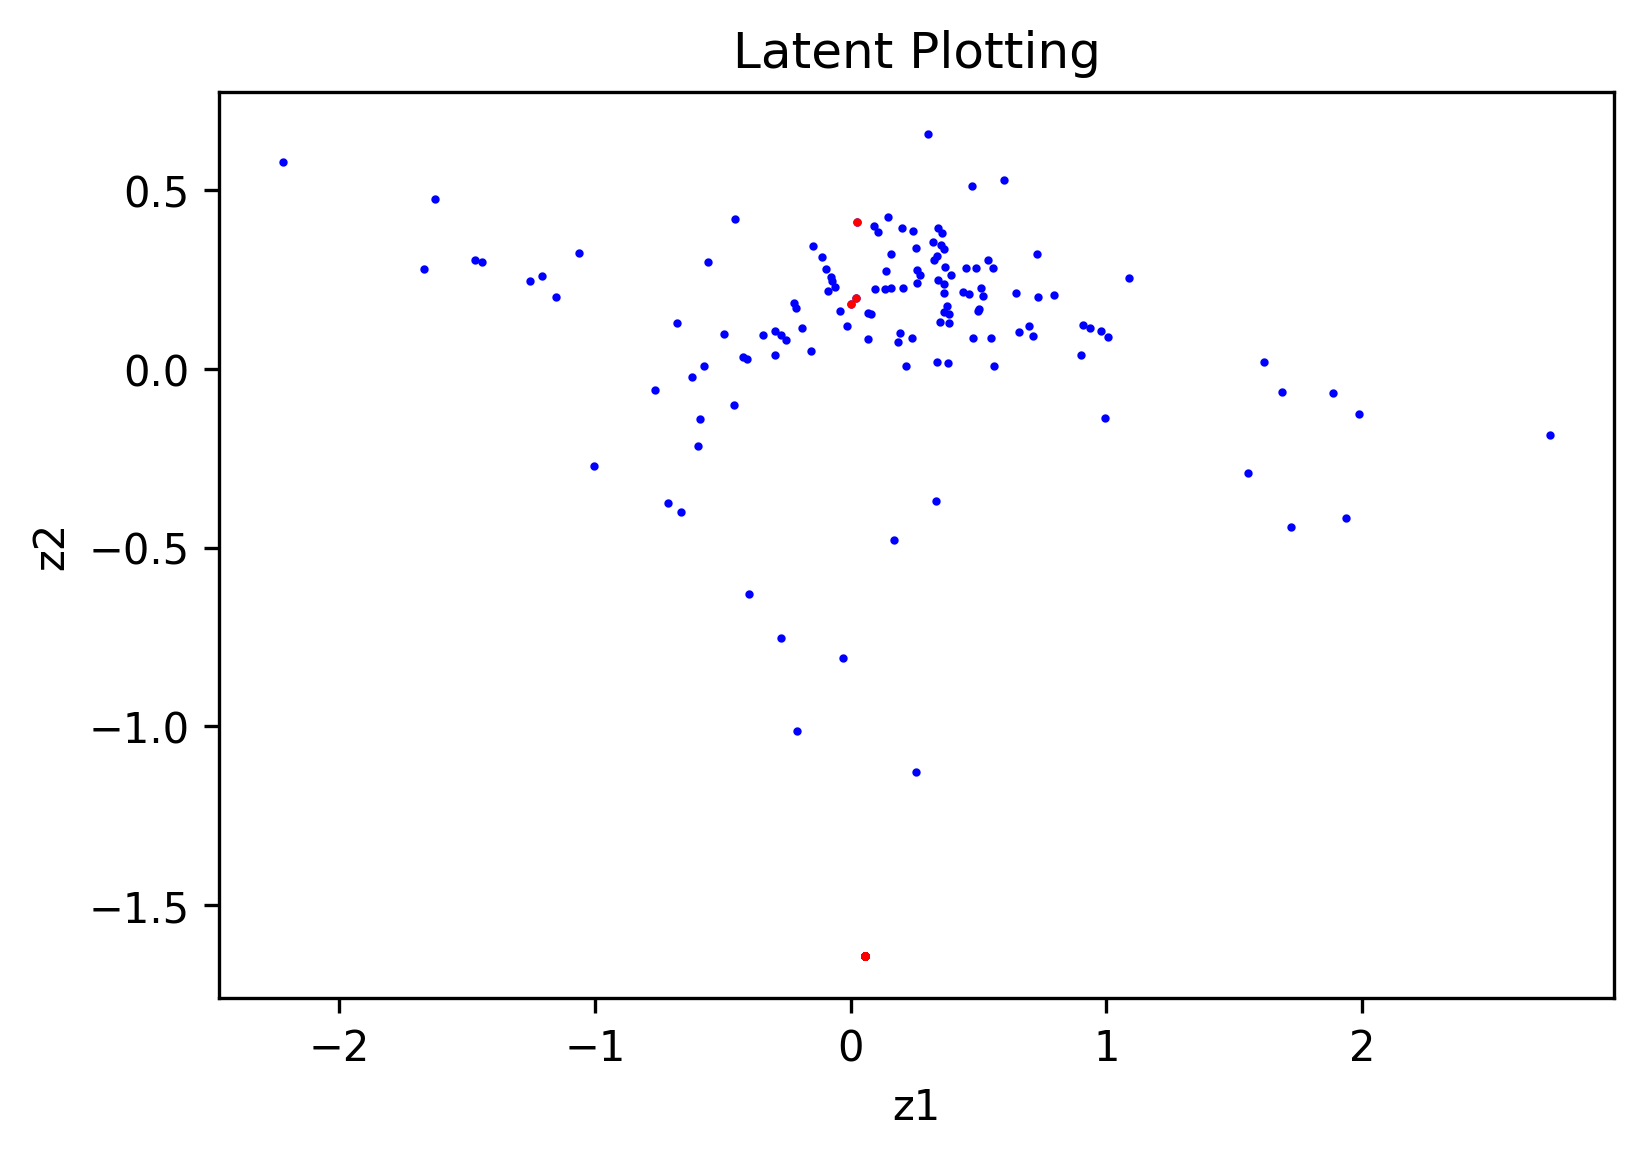

In [ ]:


plt.figure(num=1,
       dpi=300,
       facecolor='white')
plt.title('Latent Plotting')
plt.xlabel('z1')
plt.ylabel('z2')
#plt.plot(tmp_z1[i],tmp_z2[i], color="blue", linewidth=0.5, linestyle=":", label="z_value")

for i in range(0,215):
    plt.scatter(tmp_z1[i],tmp_z2[i], s=1, color="blue")

for i in range(0,215):
    if tmp_z1[i] < 0.059 and tmp_z1[i] > 0:
        #print(tmp_z1[i],tmp_z2[i])
        plt.scatter(tmp_z1[i],tmp_z2[i], s=1, color="red")
    
#plt.savefig("./Latent_batch%d-iter%d.png" % (batch_size, num_steps),dpi=500)
plt.show()